In [1]:
import arff
import numpy as np
import pandas as pd

In [2]:
# Yielding data from the arff file
def tic_tac_toe_generator():
    # Assume data_source represents how you access the dataset
    data_source = open('dataset_50_tic-tac-toe.arff', 'r')
    
    for line in data_source:
        # Process the line to create instances
        yield line  # Yield each instance or row
    data_source.close()  # Close the data source after processing



In [3]:
tic_tac_toe_data = tic_tac_toe_generator()

# Iterating through the generator to work with each yielded instance
for instance in tic_tac_toe_data:
    # Perform operations with each instance
    print(instance)  # Example: Printing each instance


% 1. Title: Tic-Tac-Toe Endgame database

% 

% 2. Source Information

%    -- Creator: David W. Aha (aha@cs.jhu.edu)

%    -- Donor: David W. Aha (aha@cs.jhu.edu)

%    -- Date: 19 August 1991

%  

% 3. Known Past Usage: 

%    1. Matheus,~C.~J., \& Rendell,~L.~A. (1989).  Constructive

%       induction on decision trees.  In {\it Proceedings of the

%       Eleventh International Joint Conference on Artificial Intelligence} 

%       (pp. 645--650).  Detroit, MI: Morgan Kaufmann.

%       -- CITRE was applied to 100-instance training and 200-instance test

%          sets.  In a study using various amounts of domain-specific

%          knowledge, its highest average accuracy was 76.7% (using the

%          final decision tree created for testing).

% 

%    2. Matheus,~C.~J. (1990). Adding domain knowledge to SBL through

%       feature construction.  In {\it Proceedings of the Eighth National

%       Conference on Artificial Intelligence} (pp. 803--808). 

%       Boston, MA: 

In [4]:
# Converting into a pandas dataframe
df = pd.DataFrame(tic_tac_toe_generator())

In [5]:
df.head()

,0
0,% 1. Title: Tic-Tac-Toe Endgame database\n
1,% \n
2,% 2. Source Information\n
3,% -- Creator: David W. Aha (aha@cs.jhu.edu)\n
4,% -- Donor: David W. Aha (aha@cs.jhu.edu)\n


In [6]:
# dropping first 10 rows
df = df.drop(df.index[0:400])

In [7]:
df.head

<bound method NDFrame.head of                                  0
400   o,x,x,o,o,x,b,b,x,positive\n
401   o,x,x,o,b,x,b,o,x,positive\n
402   o,x,x,b,x,o,x,o,b,positive\n
403   o,x,x,b,x,o,x,b,o,positive\n
404   o,x,x,b,x,o,o,x,b,positive\n
...                            ...
1046  o,x,x,x,o,o,o,x,x,negative\n
1047  o,x,o,x,x,o,x,o,x,negative\n
1048  o,x,o,x,o,x,x,o,x,negative\n
1049  o,x,o,o,x,x,x,o,x,negative\n
1050  o,o,x,x,x,o,o,x,x,negative\n

[651 rows x 1 columns]>

In [8]:
# reindexing
df = df.reset_index(drop=True)

In [9]:
df.head()

,0
0,"o,x,x,o,o,x,b,b,x,positive\n"
1,"o,x,x,o,b,x,b,o,x,positive\n"
2,"o,x,x,b,x,o,x,o,b,positive\n"
3,"o,x,x,b,x,o,x,b,o,positive\n"
4,"o,x,x,b,x,o,o,x,b,positive\n"


In [10]:
from io import StringIO

# converting to csv
csv_data = StringIO(df.to_csv(index=False))

# reading csv
df = pd.read_csv(csv_data)

df.head()

,0
0,"o,x,x,o,o,x,b,b,x,positive\n"
1,"o,x,x,o,b,x,b,o,x,positive\n"
2,"o,x,x,b,x,o,x,o,b,positive\n"
3,"o,x,x,b,x,o,x,b,o,positive\n"
4,"o,x,x,b,x,o,o,x,b,positive\n"


In [11]:
# renaming columns
df.columns = ['problem']

In [12]:
# Split the single column into multiple columns
df = df['problem'].str.split(',', expand=True)

In [13]:
# renaming columns
df.columns = ['top-left-square', 'top-middle-square', 'top-right-square', 'middle-left-square', 'middle-middle-square', 'middle-right-square', 'bottom-left-square', 'bottom-middle-square', 'bottom-right-square', 'Class']

In [14]:
df.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,o,x,x,o,o,x,b,b,x,positive\n
1,o,x,x,o,b,x,b,o,x,positive\n
2,o,x,x,b,x,o,x,o,b,positive\n
3,o,x,x,b,x,o,x,b,o,positive\n
4,o,x,x,b,x,o,o,x,b,positive\n


In [15]:
# removing \n from the last column
df['Class'] = df['Class'].str.replace('\n', '')
df.head()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,o,x,x,o,o,x,b,b,x,positive
1,o,x,x,o,b,x,b,o,x,positive
2,o,x,x,b,x,o,x,o,b,positive
3,o,x,x,b,x,o,x,b,o,positive
4,o,x,x,b,x,o,o,x,b,positive


In [16]:
# Checking for missing values
df.isnull().sum()

top-left-square         0
top-middle-square       0
top-right-square        0
middle-left-square      0
middle-middle-square    0
middle-right-square     0
bottom-left-square      0
bottom-middle-square    0
bottom-right-square     0
Class                   0
dtype: int64

In [17]:
# Checking for duplicate rows
df.duplicated().sum()

0

In [18]:
# Checking class distribution
df['Class'].value_counts()

Class
negative    332
positive    319
Name: count, dtype: int64

In [19]:
# Converting class values to numerical values
df['Class'] = df['Class'].replace(['positive', 'negative'], [1, 0])

In [20]:
# Converting categorical values to numerical values
df_encoded = pd.get_dummies(df)

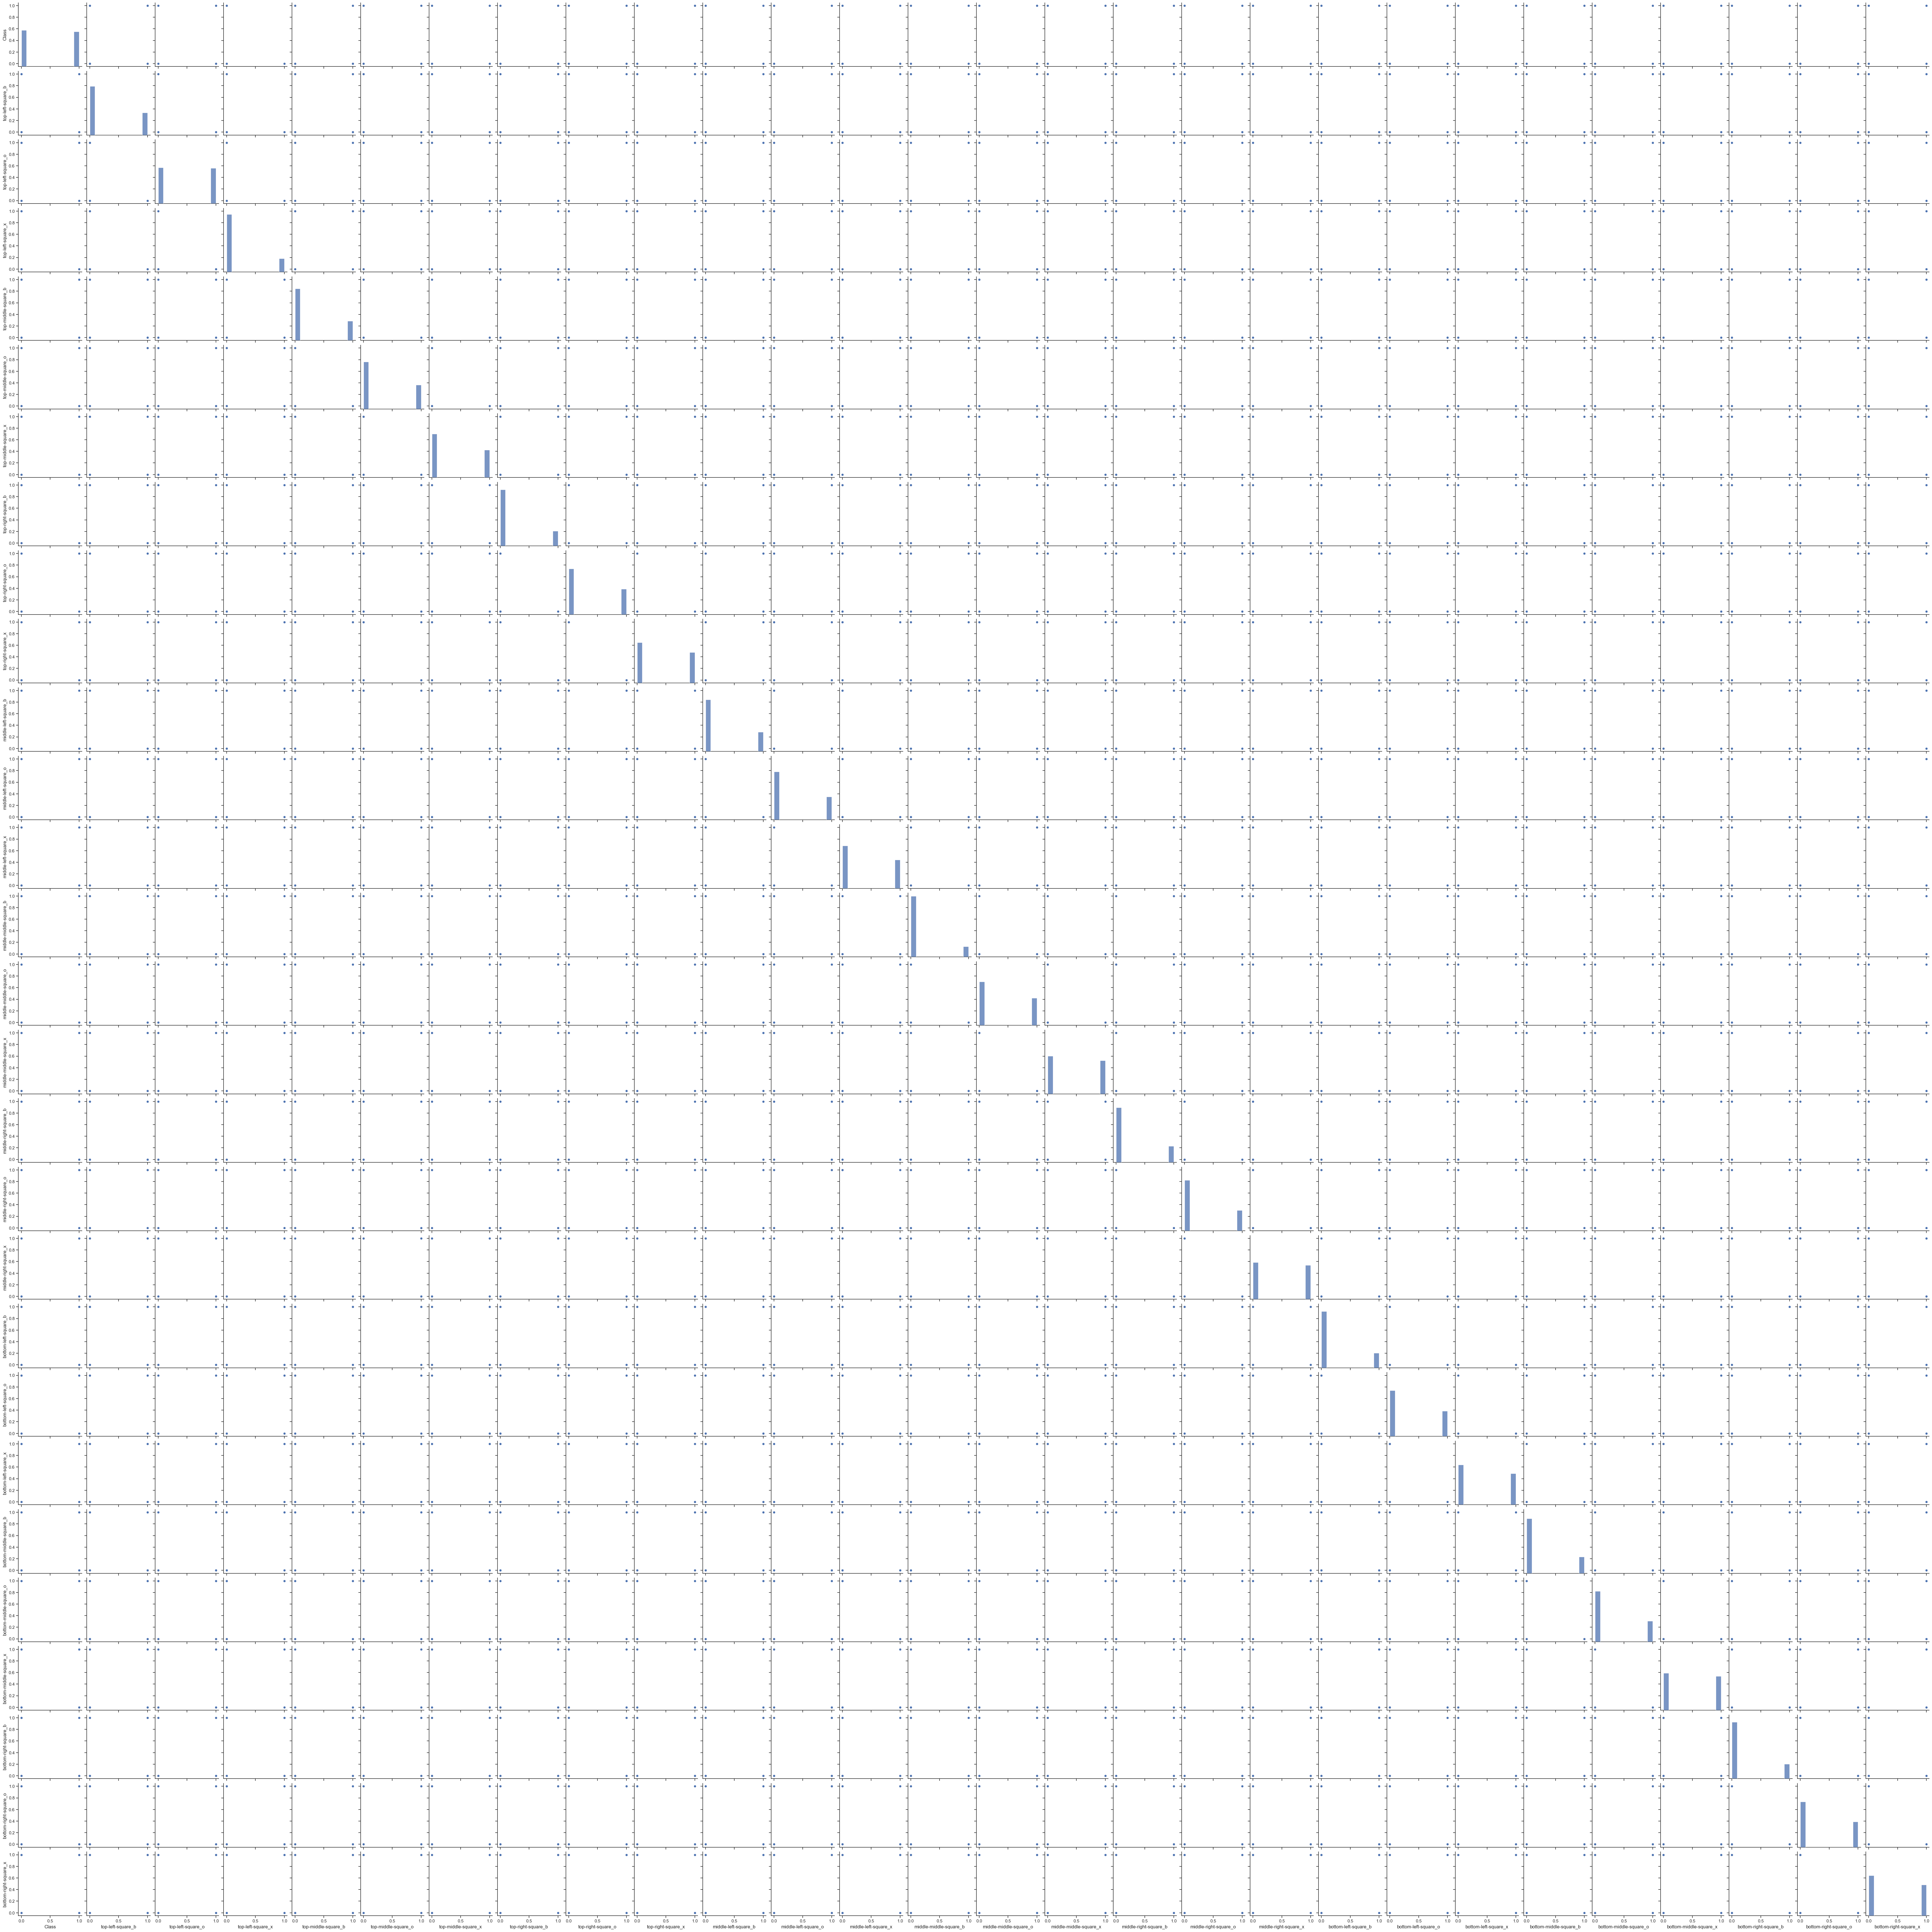

In [34]:
# Visualizing the dataset with a scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_encoded)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
train, test = train_test_split(df_encoded, test_size=0.2, random_state=42)

# Checking class distribution in train set
train['Class'].value_counts()


Class
0    274
1    246
Name: count, dtype: int64

In [26]:
# Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Separating the target variable
X = train.drop(['Class'], axis=1)
y = train['Class']

# Building a decision tree model with grid search to find the optimal hyperparameters
from sklearn.model_selection import GridSearchCV

# Setting the parameter grid
param_grid = {'max_depth': np.arange(3, 10)}

# Building the model
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)

In [28]:
# Building a decision tree model with the optimal hyperparameters
tree = DecisionTreeClassifier(max_depth=9)

# Evaluating the model using cross validation
cross_val_score(tree, X, y, cv=5)

# Fitting the model
tree.fit(X, y)

# Checking the feature importances
tree.feature_importances_


array([0.05388971, 0.00142999, 0.22693273, 0.        , 0.0366939 ,
       0.00499995, 0.        , 0.06026322, 0.02807031, 0.        ,
       0.03828225, 0.02561706, 0.        , 0.        , 0.10667037,
       0.01514985, 0.03959411, 0.02752914, 0.        , 0.03463173,
       0.02126444, 0.01169988, 0.01773503, 0.02377119, 0.        ,
       0.07051028, 0.15526488])

In [29]:
# Checking the accuracy on the test set
from sklearn.metrics import accuracy_score

# Separating the target variable
X_test = test.drop(['Class'], axis=1)
y_test = test['Class']

# Making predictions
y_pred = tree.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        58
           1       0.95      0.95      0.95        73

    accuracy                           0.94       131
   macro avg       0.94      0.94      0.94       131
weighted avg       0.94      0.94      0.94       131



In [32]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

# Checking the accuracy
accuracy_score(y_test, y_pred)



[[54  4]
 [ 4 69]]


0.9389312977099237

In [37]:
# Creating a SVM model
from sklearn.svm import SVC

# Building a SVM model with grid search to find the optimal hyperparameters
from sklearn.model_selection import GridSearchCV

# Setting the parameter grid
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, verbose=3)

# Fitting the model
grid.fit(X, y)

# Checking the best parameters
grid.best_params_


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.519 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.962 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.990 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.990 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.817 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [39]:
# Building a SVM model with the optimal hyperparameters
svc = SVC(C=100, gamma=0.001, kernel='rbf')

# Evaluating the model using cross validation
cross_val_score(svc, X, y, cv=5)

# Fitting the model
svc.fit(X, y)

# Making predictions
y_pred = svc.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.96      1.00      0.98        73

    accuracy                           0.98       131
   macro avg       0.98      0.97      0.98       131
weighted avg       0.98      0.98      0.98       131



In [40]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))



[[55  3]
 [ 0 73]]


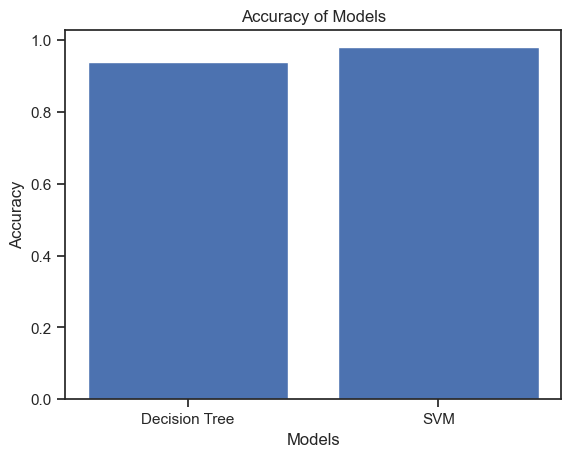

In [43]:
# Graphing the accuracy of the models
import matplotlib.pyplot as plt

x = ['Decision Tree', 'SVM']
y = [0.94, 0.98]

plt.bar(x, y)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.show()



In [45]:
# getting instances when class is positive
df_positive = df_encoded[df_encoded['Class'] == 1]

# getting instances when class is negative
df_negative = df_encoded[df_encoded['Class'] == 0]
